In [1]:
import pandas as pd

In [2]:
# Load the dataset to inspect its structure
file_path = 'D:/FYP/Datasets/fitness_tracker_dataset.csv'
data = pd.read_csv(file_path)

data


,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired


In [3]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])
# Extract the year
data['year'] = data['date'].dt.year
# Get all unique years
unique_years = data['year'].unique()
# Sort the years
unique_years = sorted(unique_years)
print("Unique years in the data:", unique_years)

Unique years in the data: [2023, 2024, 2025]


In [4]:
# Keep only rows where the year is not 2025
data = data[data['year'] != 2025]
# Drop the 'year' column if it's no longer needed
data = data.drop(columns=['year'])
print("Data after removing rows with year 2025:")
print(data)

Data after removing rows with year 2025:
        user_id       date  steps  calories_burned  distance_km  \
0           468 2023-01-01   4530          2543.02        16.10   
1           879 2023-01-01  11613          1720.76         8.10   
2           152 2023-01-01  27335          1706.35         3.57   
3           311 2023-01-01  13459          2912.38         6.41   
4           759 2023-01-01  15378          3344.51        17.88   
...         ...        ...    ...              ...          ...   
730995      587 2024-12-31  22381          2186.32        10.46   
730996      189 2024-12-31   8316          2805.43         0.09   
730997      262 2024-12-31  18582          3202.74        10.05   
730998      214 2024-12-31  17346          2248.72        18.93   
730999      365 2024-12-31  29599          2929.43        12.50   

        active_minutes  sleep_hours  heart_rate_avg workout_type  \
0                  613          1.5             176      Walking   
1                 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 731000 entries, 0 to 730999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   user_id             731000 non-null  int64         
 1   date                731000 non-null  datetime64[ns]
 2   steps               731000 non-null  int64         
 3   calories_burned     731000 non-null  float64       
 4   distance_km         731000 non-null  float64       
 5   active_minutes      731000 non-null  int64         
 6   sleep_hours         731000 non-null  float64       
 7   heart_rate_avg      731000 non-null  int64         
 8   workout_type        626459 non-null  object        
 9   weather_conditions  731000 non-null  object        
 10  location            731000 non-null  object        
 11  mood                731000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 72.5+ MB


In [6]:
# Check for missing values and duplicate entries
missing_values = data.isnull().sum()
missing_values

user_id                    0
date                       0
steps                      0
calories_burned            0
distance_km                0
active_minutes             0
sleep_hours                0
heart_rate_avg             0
workout_type          104541
weather_conditions         0
location                   0
mood                       0
dtype: int64

check the correlation between workout_type and all the numerical value to determine which type of imputation is suitable

In [7]:
# Group by workout_type and calculate mean for numerical features
correlation_check = data.groupby('workout_type')[['active_minutes', 'distance_km', 'calories_burned']].mean()

print("\nCorrelation check (grouped means):")
print(correlation_check)



Correlation check (grouped means):
              active_minutes  distance_km  calories_burned
workout_type                                              
Cycling           718.163482     9.978352      2748.305643
Gym Workout       718.831389    10.013129      2747.631206
Running           722.195517     9.983517      2751.571065
Swimming          717.788423     9.980673      2751.184118
Walking           718.701559     9.995925      2750.606005
Yoga              720.378453    10.004084      2751.555844


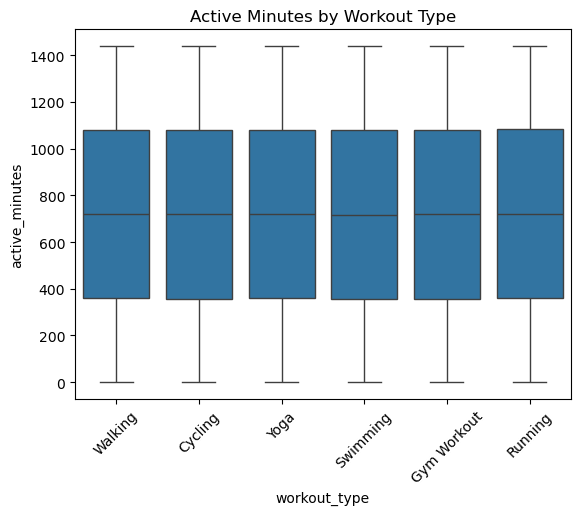

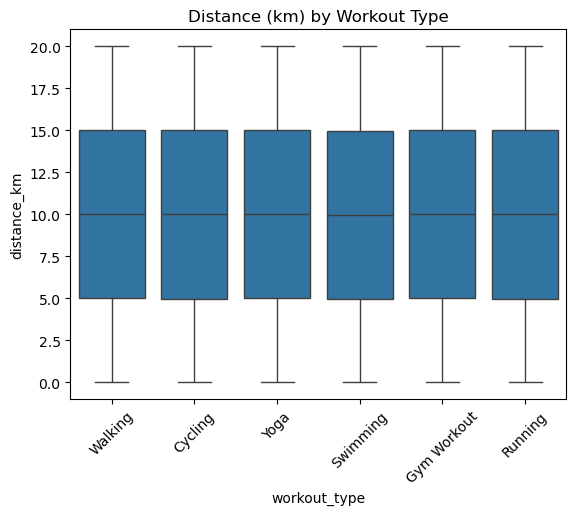

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot active_minutes vs workout_type
sns.boxplot(data=data, x='workout_type', y='active_minutes')
plt.title('Active Minutes by Workout Type')
plt.xticks(rotation=45)
plt.show()

# Plot distance_km vs workout_type
sns.boxplot(data=data, x='workout_type', y='distance_km')
plt.title('Distance (km) by Workout Type')
plt.xticks(rotation=45)
plt.show()


In [9]:
from scipy.stats import chi2_contingency

# Create a contingency table for workout_type and weather_conditions
contingency_table = pd.crosstab(data['workout_type'], data['weather_conditions'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test p-value: {p}")
if p < 0.05:
    print("Significant correlation between workout_type and weather_conditions.")
else:
    print("No significant correlation between workout_type and weather_conditions.")


Chi-Square Test p-value: 0.9325329599932501
No significant correlation between workout_type and weather_conditions.


In [10]:
from scipy.stats import f_oneway

# Perform ANOVA
anova_result = f_oneway(
    data[data['workout_type'] == 'Walking']['active_minutes'],
    data[data['workout_type'] == 'Running']['active_minutes'],
    data[data['workout_type'] == 'Cycling']['active_minutes'],
    data[data['workout_type'] == 'Swimming']['active_minutes'],
    data[data['workout_type'] == 'Yoga']['active_minutes'],
    data[data['workout_type'] == 'Gym Workout']['active_minutes']
)

print(f"ANOVA p-value for active_minutes: {anova_result.pvalue}")
if anova_result.pvalue < 0.05:
    print("Active_minutes is significantly different across workout types.")
else:
    print("No significant difference in active_minutes across workout types.")


ANOVA p-value for active_minutes: 0.142435896497959
No significant difference in active_minutes across workout types.


In [11]:
# Fill missing workout_type with 'No Workout'
data['workout_type'].fillna('No Workout', inplace=True)

print("\nMissing workout_type filled with 'No Workout':")
print(data['workout_type'].value_counts())



Missing workout_type filled with 'No Workout':
workout_type
Cycling        104813
Gym Workout    104554
No Workout     104541
Running        104518
Walking        104265
Yoga           104219
Swimming       104090
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8068\2431935083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['workout_type'].fillna('No Workout', inplace=True)


In [12]:
data.isnull().sum()

user_id               0
date                  0
steps                 0
calories_burned       0
distance_km           0
active_minutes        0
sleep_hours           0
heart_rate_avg        0
workout_type          0
weather_conditions    0
location              0
mood                  0
dtype: int64

data sorting to user_id

In [13]:
# Sort the data by user_id and date
data = data.sort_values(by=['user_id', 'date']).reset_index(drop=True)
# Verify sorting
print(data[['user_id', 'date']])

        user_id       date
0             1 2023-01-02
1             1 2023-01-03
2             1 2023-01-05
3             1 2023-01-06
4             1 2023-01-08
...         ...        ...
730995      999 2024-12-28
730996      999 2024-12-28
730997      999 2024-12-29
730998      999 2024-12-29
730999      999 2024-12-30

[731000 rows x 2 columns]


In [14]:
# Check for duplicate entries
duplicates = data.duplicated().sum()
print(duplicates)


0


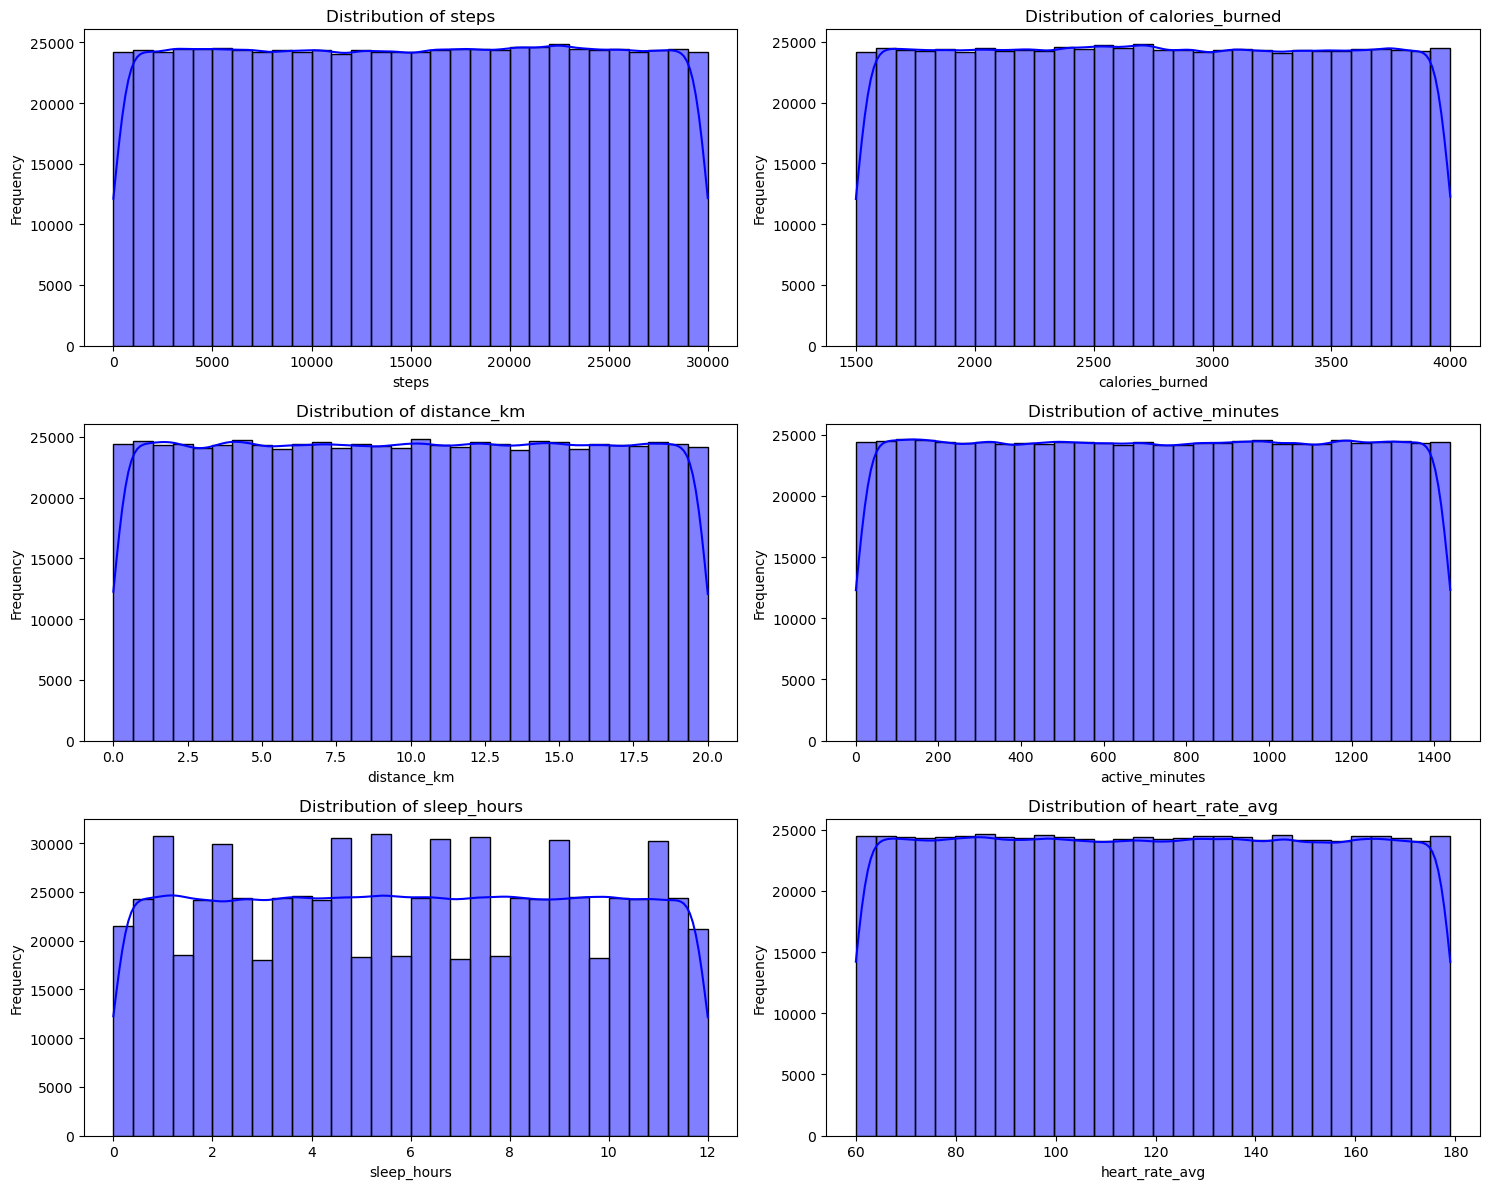

In [15]:
# Numerical features for visualization
numerical_features = ['steps', 'calories_burned', 'distance_km', 
                      'active_minutes', 'sleep_hours', 'heart_rate_avg']

# Plot distributions of numerical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


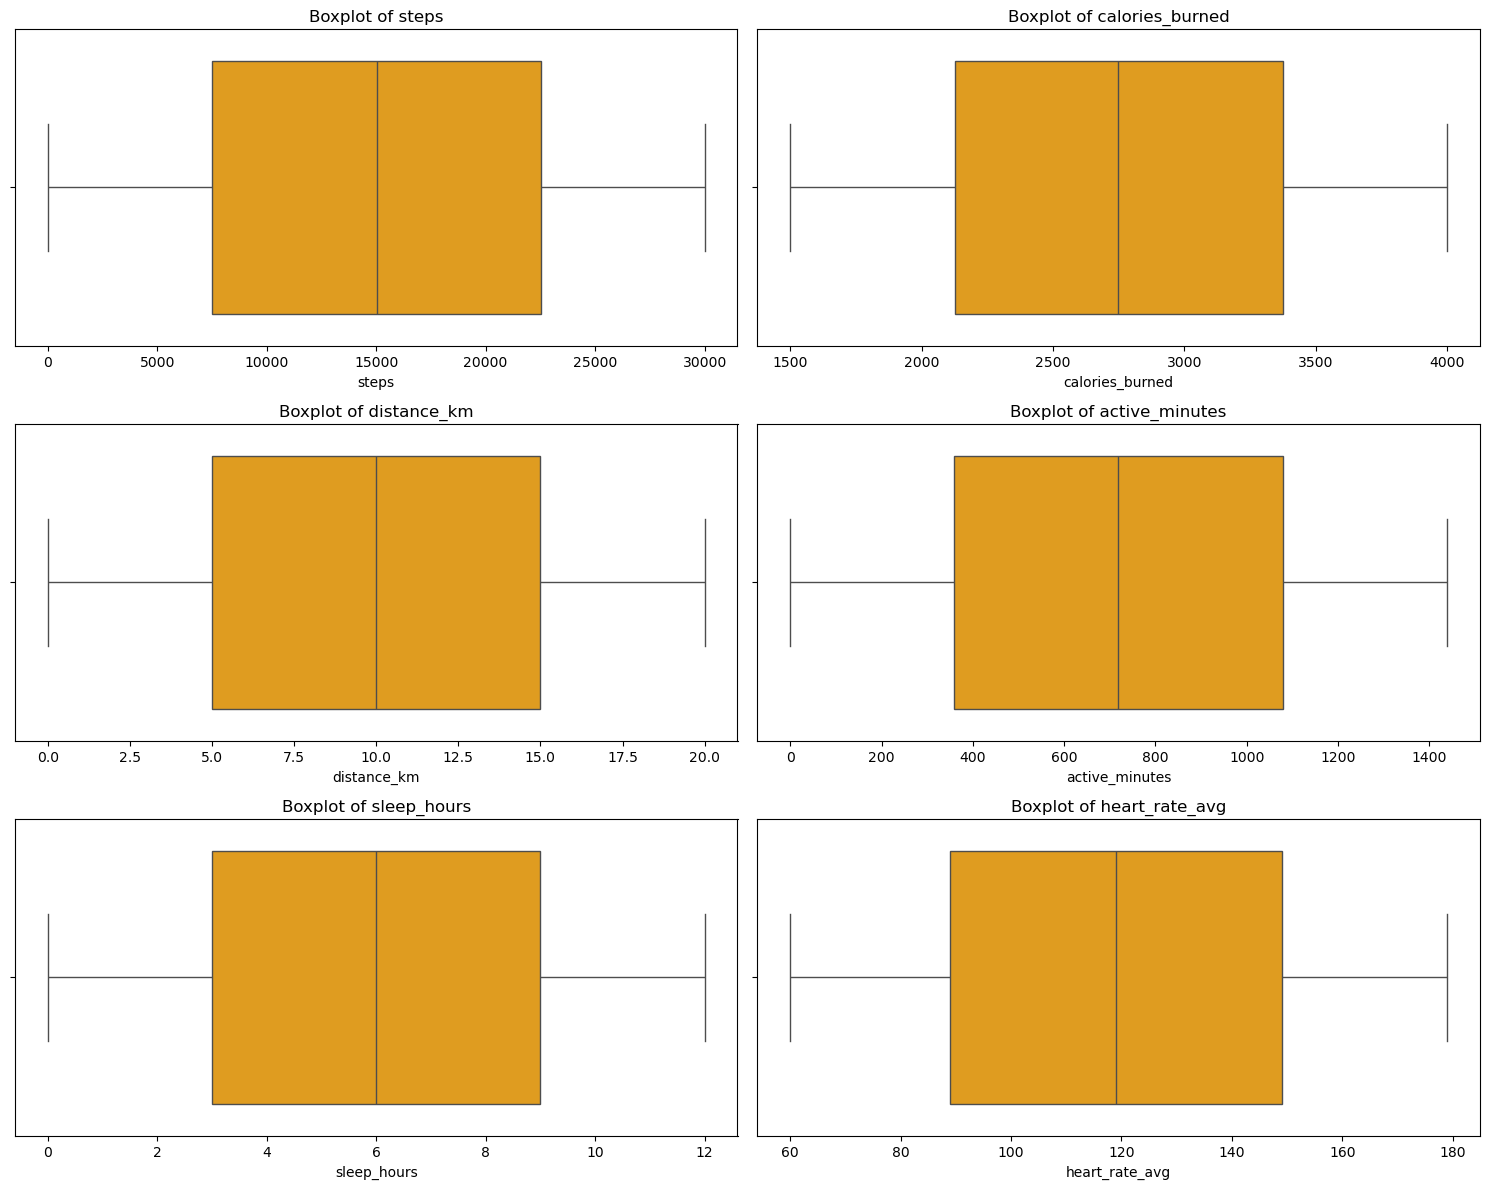

In [16]:
# Check for outliers in each numerical feature using boxplot
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_8068\1496988362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[feature], order=data[feature].value_counts().index, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_8068\1496988362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[feature], order=data[feature].value_counts().index, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_8068\1496988362.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[feature], order=data[feature].value_counts().

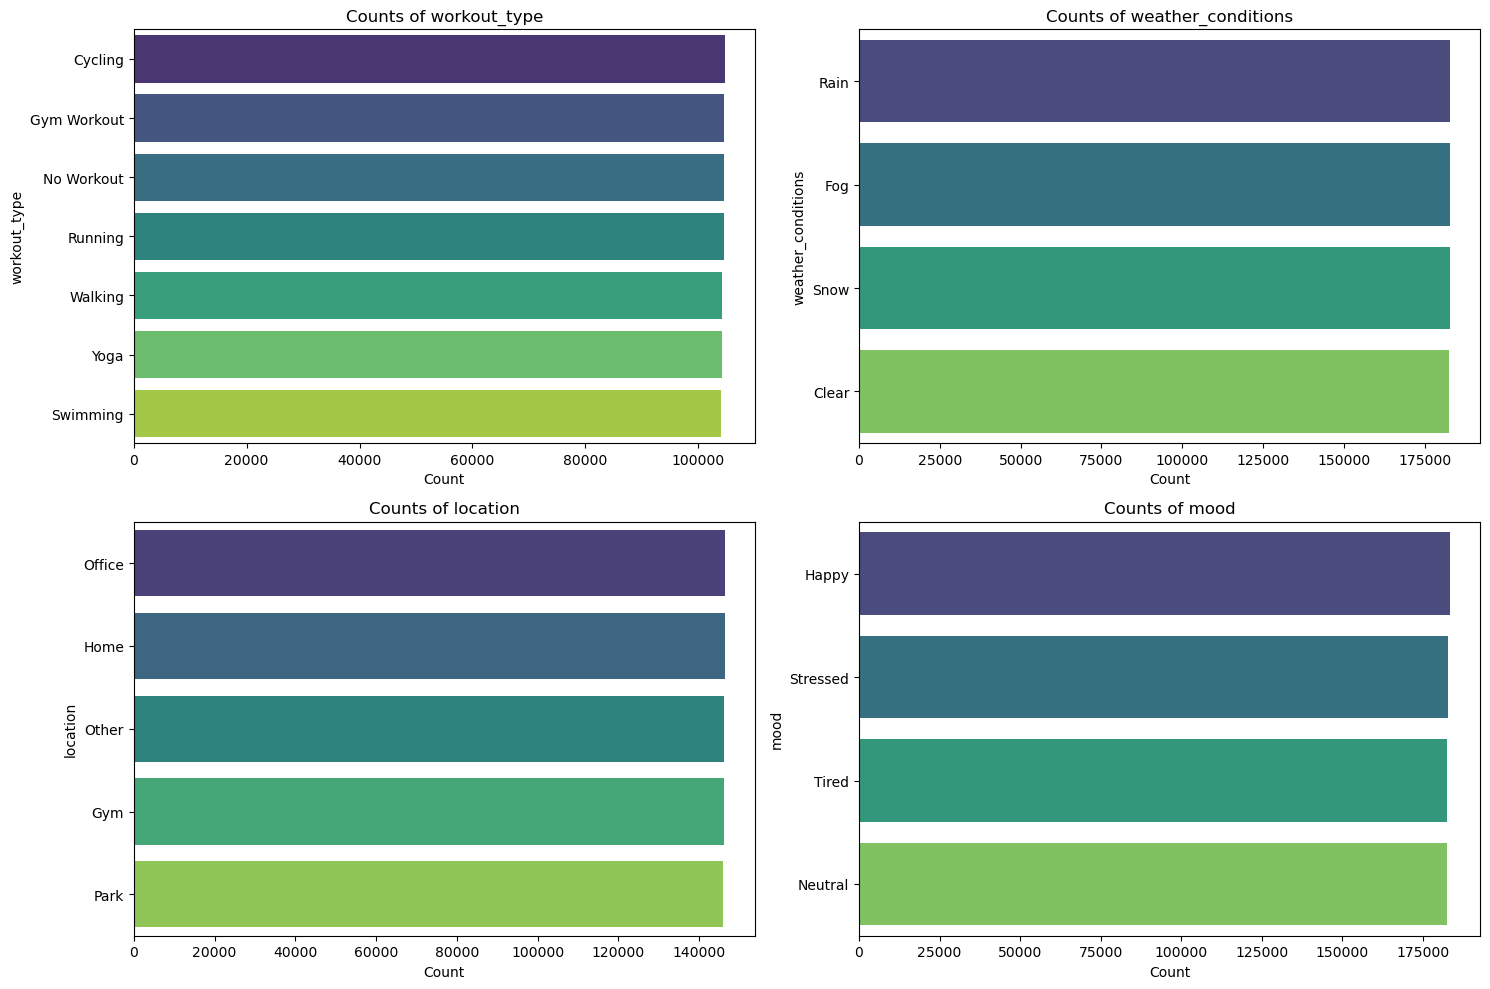

In [17]:
# Categorical features for visualization
categorical_features = ['workout_type', 'weather_conditions', 'location', 'mood']

# Plot counts of categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=data[feature], order=data[feature].value_counts().index, palette='viridis')
    plt.title(f'Counts of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


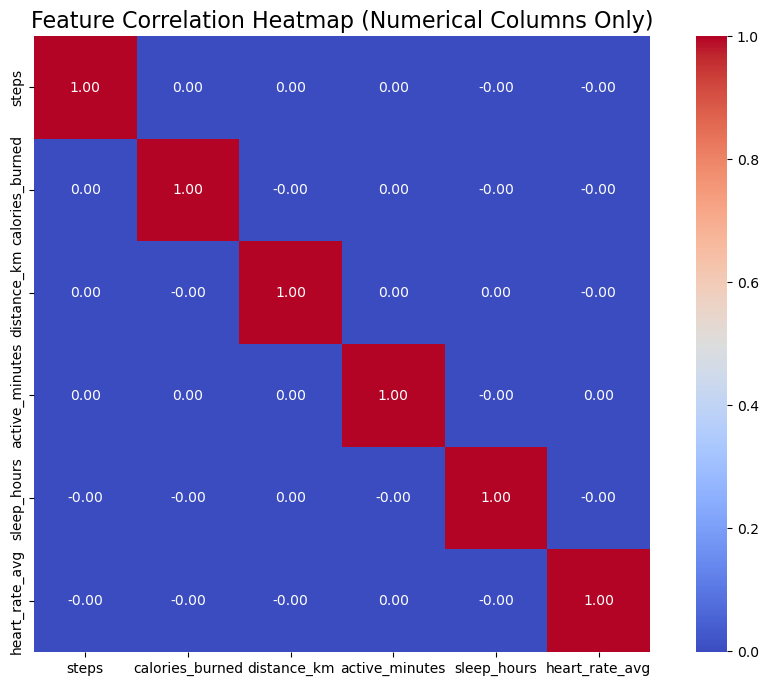

In [18]:
# Select only numerical columns (int and float) and exclude 'user_id'
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = numerical_cols.drop('user_id')  # Exclude 'user_id' if present

# Calculate the correlation matrix
correlation_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True, 
    cbar=True
)
plt.title("Feature Correlation Heatmap (Numerical Columns Only)", fontsize=16)
plt.show()


In [19]:
# Check variance of numerical columns
print(data[numerical_cols].var())

steps              7.496795e+07
calories_burned    5.203201e+05
distance_km        3.335452e+01
active_minutes     1.731198e+05
sleep_hours        1.199067e+01
heart_rate_avg     1.200948e+03
dtype: float64


In [20]:
# Calculate Pearson correlation
# correlation_matrix = data[numerical_cols].corr(method='pearson')
# Alternatively, for non-linear relationships:
correlation_matrix = data[numerical_cols].corr(method='spearman')


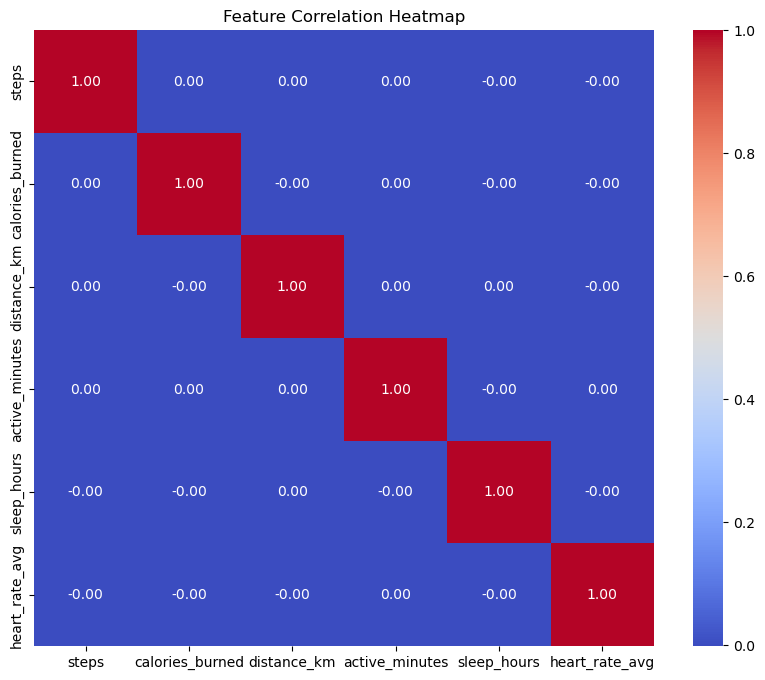

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()


Data Encoding

In [22]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['workout_type', 'weather_conditions', 'location', 'mood'], dtype='object')


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the original DataFrame for encoding and normalization
encoded_data = data.copy()

# Example: Label Encoding for ordinal categories
if 'mood' in encoded_data.columns:  # Example ordinal column
    mood_order = {'Tired': 1, 'Neutral': 2, 'Happy': 3, 'Stressed': 0}
    encoded_data['mood_encoded'] = encoded_data['mood'].map(mood_order)

# Define impact-based mappings for each column
workout_type_mapping = {
    'No Workout': 0, 'Walking': 1, 'Cycling': 2, 'Yoga': 3, 
    'Gym Workout': 4, 'Running': 5, 'Swimming': 6
}

weather_conditions_mapping = {
    'Fog': 0, 'Rain': 1, 'Snow': 2, 'Clear': 3
}

location_mapping = {
    'Other': 0, 'Home': 1, 'Office': 2, 'Park': 3, 'Gym': 4
}

# Map the columns using the defined dictionaries
if 'workout_type' in encoded_data.columns:
    encoded_data['workout_type_encoded'] = encoded_data['workout_type'].map(workout_type_mapping)

if 'weather_conditions' in encoded_data.columns:
    encoded_data['weather_conditions_encoded'] = encoded_data['weather_conditions'].map(weather_conditions_mapping)

if 'location' in encoded_data.columns:
    encoded_data['location_encoded'] = encoded_data['location'].map(location_mapping)

In [24]:
# Exclude date column
columns_to_normalize = encoded_data.columns.difference(['date'])

In [25]:
from sklearn.preprocessing import StandardScaler
# Identify numerical columns excluding 'user_id' and encoded columns
numerical_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns
excluded_cols = ['user_id', 'mood_encoded', 'workout_type_encoded', 'weather_conditions_encoded', 'location_encoded']
numerical_cols = numerical_cols.difference(excluded_cols)
# Initialize the scaler
scaler1 = StandardScaler()
# Apply Z-score normalization only to numerical columns
encoded_data[numerical_cols] = scaler1.fit_transform(encoded_data[numerical_cols])
# View normalized data
print(encoded_data.head())

   user_id       date     steps  calories_burned  distance_km  active_minutes  \
0        1 2023-01-02  0.756021         0.409498    -1.675126        0.292435   
1        1 2023-01-03 -1.530430         1.187184    -0.038857       -0.366098   
2        1 2023-01-05  0.745857        -0.216068    -0.856126        1.388388   
3        1 2023-01-06 -1.249431         0.852955    -0.560039        0.511145   
4        1 2023-01-08  1.676630        -1.055737     1.368854       -0.060865   

   sleep_hours  heart_rate_avg workout_type weather_conditions location  \
0     1.588981        0.189368      Cycling               Rain     Park   
1    -0.172623       -1.253439      Cycling              Clear      Gym   
2     0.635982        1.603319      Walking              Clear     Park   
3    -0.836834        0.073943     Swimming               Rain   Office   
4     1.155800       -1.715138      Cycling              Clear   Office   

       mood  mood_encoded  workout_type_encoded  weather_condi

In [26]:
encoded_data_copy = encoded_data.copy()

In [27]:
normalized_columns = [
    'steps', 'calories_burned', 'distance_km',
    'active_minutes', 'sleep_hours', 'heart_rate_avg'
]

# Select only normalized and encoded features for score calculation
encoded_features = [
    'mood_encoded', 'workout_type_encoded', 
    'weather_conditions_encoded', 'location_encoded'
]

all_selected_features = normalized_columns + encoded_features


Feature engineering to create column of healthy score and healthy status

In [28]:
# Define feature weights
feature_weights = {
    'steps': 0.15,
    'calories_burned': 0.1,
    'active_minutes': 0.15,
    'sleep_hours': 0.2,
    'heart_rate_avg': 0.15,
    'distance_km': 0.1,
    'mood_encoded': 0.15,
    'workout_type_encoded': 0.1,
    'weather_conditions_encoded': 0.05,
    'location_encoded': 0.05
}
# Ensure all features exist in the DataFrame
selected_features = [col for col in feature_weights.keys() if col in encoded_data.columns]
# Compute healthy_score as a weighted sum of features
encoded_data['healthy_score_raw'] = encoded_data[selected_features].mul(
    [feature_weights[col] for col in selected_features], axis=1
).sum(axis=1)
# Normalize healthy_score_raw to the range [0, 1]
scaler2 = MinMaxScaler()
encoded_data['healthy_score'] = scaler2.fit_transform(encoded_data[['healthy_score_raw']])

In [29]:
# Define healthy_status based on healthy_score thresholds
def assign_health_status(score):
    if score >= 0.5:
        return 'Healthy'
    else:
        return 'Unhealthy'

encoded_data['healthy_status'] = encoded_data['healthy_score'].apply(assign_health_status)
# # View the resulting dataframe
encoded_data

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood,mood_encoded,workout_type_encoded,weather_conditions_encoded,location_encoded,healthy_score_raw,healthy_score,healthy_status
0,1,2023-01-02,0.756021,0.409498,-1.675126,0.292435,1.588981,0.189368,Cycling,Rain,Park,Stressed,0,2,1,3,0.776907,0.515367,Healthy
1,1,2023-01-03,-1.530430,1.187184,-0.038857,-0.366098,-0.172623,-1.253439,Cycling,Clear,Gym,Neutral,2,2,3,4,0.457813,0.427150,Unhealthy
2,1,2023-01-05,0.745857,-0.216068,-0.856126,1.388388,0.635982,1.603319,Walking,Clear,Park,Happy,3,1,3,3,1.430612,0.696090,Healthy
3,1,2023-01-06,-1.249431,0.852955,-0.560039,0.511145,-0.836834,0.073943,Swimming,Rain,Office,Tired,1,6,1,2,0.662273,0.483675,Unhealthy
4,1,2023-01-08,1.676630,-1.055737,1.368854,-0.060865,1.155800,-1.715138,Cycling,Clear,Office,Neutral,2,2,3,2,0.997566,0.576370,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730995,999,2024-12-28,1.270781,-0.877677,0.395750,0.314066,0.607104,1.112764,Swimming,Clear,Office,Tired,1,6,3,2,1.477870,0.709155,Healthy
730996,999,2024-12-28,0.093312,-0.796744,-0.385157,-1.486085,0.289437,-0.156906,Walking,Fog,Gym,Tired,1,1,0,4,0.157246,0.344055,Unhealthy
730997,999,2024-12-29,0.744471,-1.418857,-0.305508,0.378958,-0.028229,-0.416611,Running,Clear,Gym,Happy,3,5,3,4,1.227940,0.640059,Healthy
730998,999,2024-12-29,0.620314,1.218030,0.913469,1.703234,1.069164,0.737634,Swimming,Snow,Home,Happy,3,6,2,1,2.086160,0.877323,Healthy


In [30]:
# Prepare two separate DataFrames for output

# First file: Normalized and encoded data with healthy_score and healthy_status
encoded_file = encoded_data[
    all_selected_features + ['healthy_status']
]

# Second file: Original data with healthy_score and healthy_status added
original_file = data.copy()
original_file['healthy_status'] = encoded_data['healthy_status']

# Save the two files
encoded_file.to_csv('healthy_lifestyle_encoded_data(FYPCODE3).csv', index=False)
original_file.to_csv('healthy_lifestyle_original_data_with_scores(FYPCODE3).csv', index=False)

print("Files saved successfully:")
print("- Encoded and normalized data: 'healthy_lifestyle_encoded_data.csv'")
print("- Original data with scores: 'healthy_lifestyle_original_data_with_scores.csv'")

Files saved successfully:
- Encoded and normalized data: 'healthy_lifestyle_encoded_data.csv'
- Original data with scores: 'healthy_lifestyle_original_data_with_scores.csv'


In [31]:
encoded_file.healthy_status.unique()

array(['Healthy', 'Unhealthy'], dtype=object)

C:\Users\user\AppData\Local\Temp\ipykernel_8068\1197612735.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=health_status_counts.index, y=health_status_counts.values, palette="viridis")


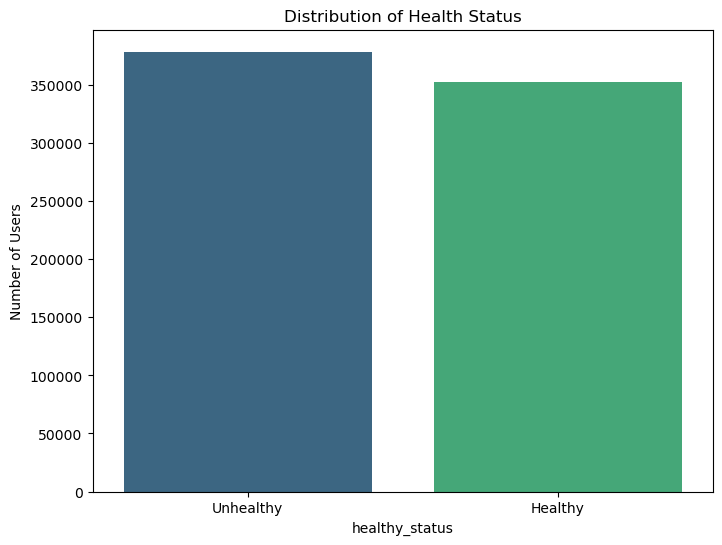

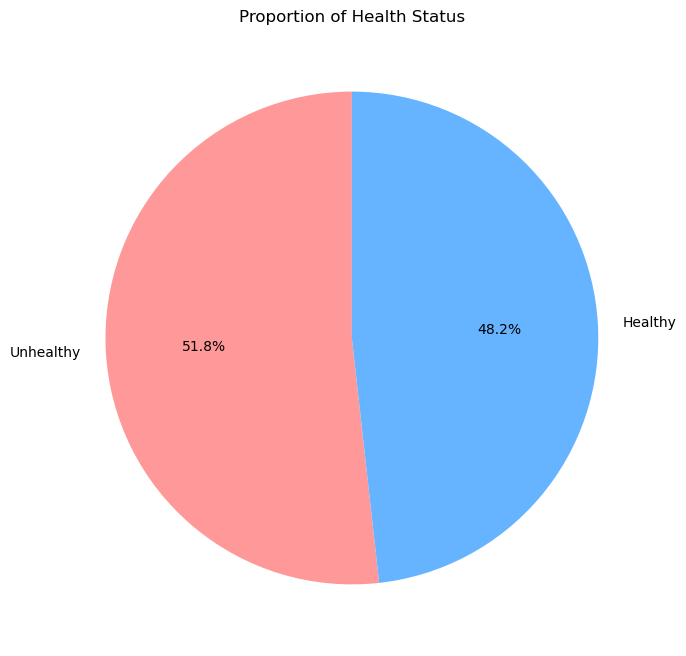

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of users in each category
health_status_counts = encoded_file['healthy_status'].value_counts()

# Bar chart for health status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=health_status_counts.index, y=health_status_counts.values, palette="viridis")
plt.title('Distribution of Health Status')
plt.xlabel('healthy_status')
plt.ylabel('Number of Users')
plt.show()

# Pie chart for health status distribution
plt.figure(figsize=(8, 8))
health_status_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff', '#FFFF00'], labels=health_status_counts.index)
plt.title('Proportion of Health Status')
plt.ylabel('')  # Removes y-axis label for clarity
plt.show()


In [33]:
print(encoded_file['healthy_status'].value_counts())

healthy_status
Unhealthy    378418
Healthy      352582
Name: count, dtype: int64


C:\Users\user\AppData\Local\Temp\ipykernel_8068\2367317543.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_file, x='healthy_status', y=feature, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_8068\2367317543.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_file, x='healthy_status', y=feature, palette='Set2')
C:\Users\user\AppData\Local\Temp\ipykernel_8068\2367317543.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=original_file, x='healthy_status', y=feature, palette='Set2')
C:\Users\u

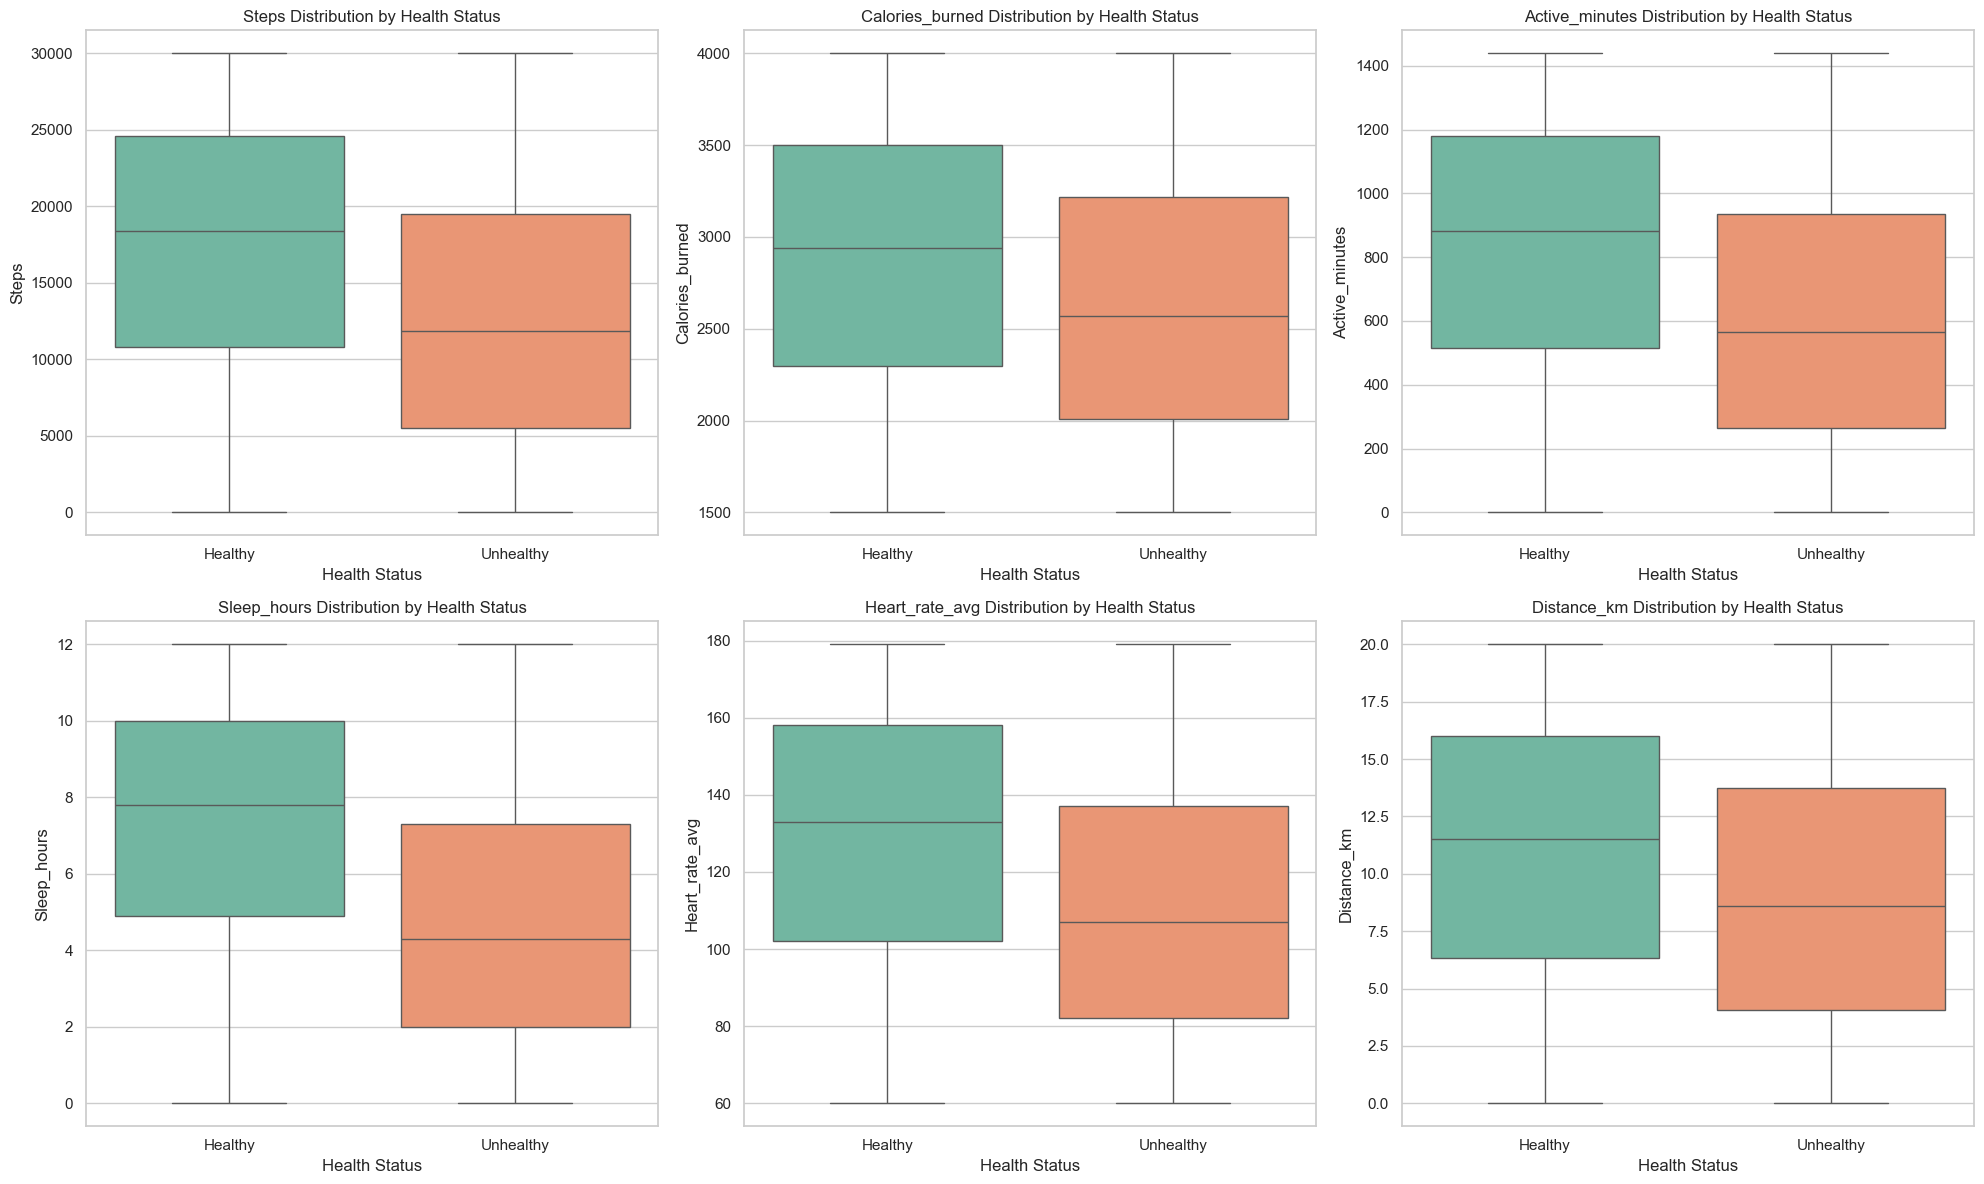

In [71]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Features to visualize
features_to_visualize = ['steps', 'calories_burned', 'active_minutes', 'sleep_hours', 'heart_rate_avg', 'distance_km']

# Create subplots
plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)  # 2 rows, 3 columns
    sns.boxplot(data=original_file, x='healthy_status', y=feature, palette='Set2')
    plt.title(f'{feature.capitalize()} Distribution by Health Status')
    plt.xlabel('Health Status')
    plt.ylabel(feature.capitalize())

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


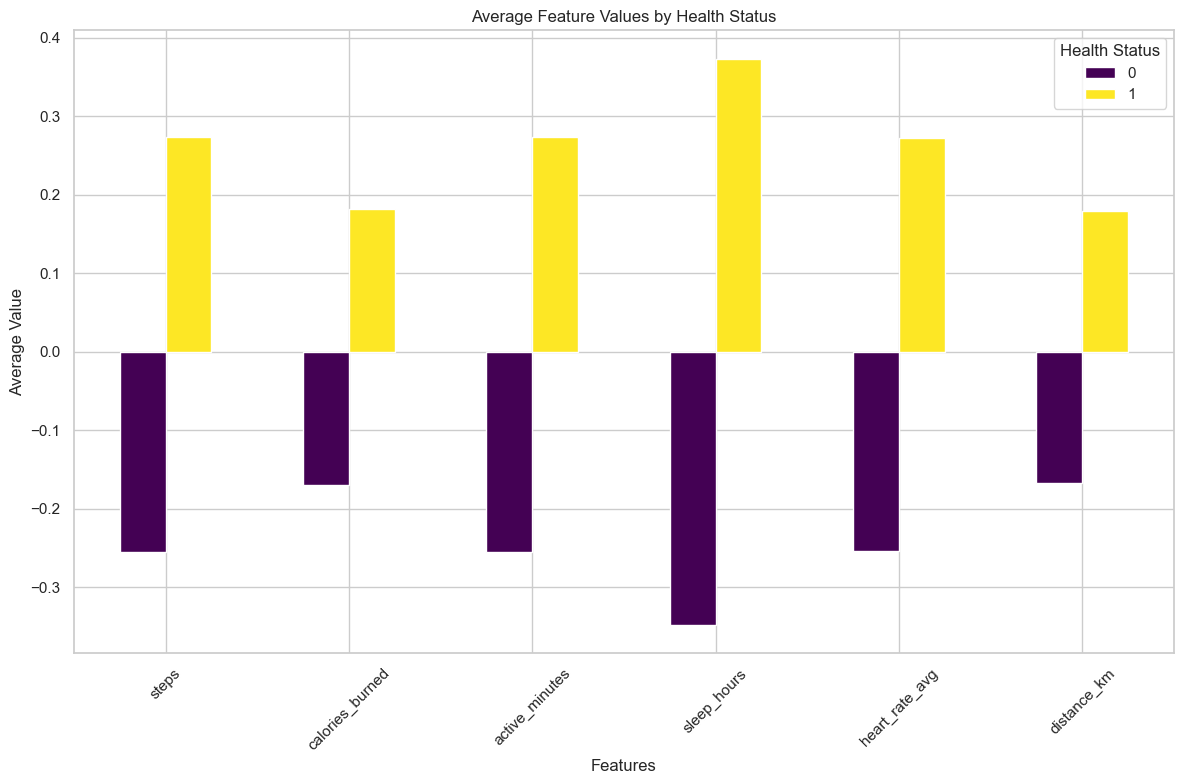

In [69]:
# Bar plot to compare average feature values for Healthy vs. Unhealthy groups
mean_values = encoded_file.groupby('healthy_status')[features_to_visualize].mean().reset_index()
mean_values.set_index('healthy_status', inplace=True)

# Plotting average values
mean_values.T.plot(kind='bar', figsize=(12, 8), colormap='viridis')
plt.title('Average Feature Values by Health Status')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend(title='Health Status')
plt.tight_layout()
plt.show()

In [34]:
encoded_file

,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,mood_encoded,workout_type_encoded,weather_conditions_encoded,location_encoded,healthy_status
0,0.756021,0.409498,-1.675126,0.292435,1.588981,0.189368,0,2,1,3,Healthy
1,-1.530430,1.187184,-0.038857,-0.366098,-0.172623,-1.253439,2,2,3,4,Unhealthy
2,0.745857,-0.216068,-0.856126,1.388388,0.635982,1.603319,3,1,3,3,Healthy
3,-1.249431,0.852955,-0.560039,0.511145,-0.836834,0.073943,1,6,1,2,Unhealthy
4,1.676630,-1.055737,1.368854,-0.060865,1.155800,-1.715138,2,2,3,2,Healthy
...,...,...,...,...,...,...,...,...,...,...,...
730995,1.270781,-0.877677,0.395750,0.314066,0.607104,1.112764,1,6,3,2,Healthy
730996,0.093312,-0.796744,-0.385157,-1.486085,0.289437,-0.156906,1,1,0,4,Unhealthy
730997,0.744471,-1.418857,-0.305508,0.378958,-0.028229,-0.416611,3,5,3,4,Healthy
730998,0.620314,1.218030,0.913469,1.703234,1.069164,0.737634,3,6,2,1,Healthy


In [35]:
!pip install xgboost

In [36]:
!pip install catboost

In [37]:
healthy_status_mapping = {
    'Unhealthy': 0, 'Healthy': 1
}

# Map the columns using the defined dictionaries
if 'healthy_status' in encoded_file.columns:
    encoded_file['healthy_status'] = encoded_data['healthy_status'].map(healthy_status_mapping)
    encoded_file['healthy_status'] = encoded_file['healthy_status'].astype(int)

print(encoded_file['healthy_status'])


0         1
1         0
2         1
3         0
4         1
         ..
730995    1
730996    0
730997    1
730998    1
730999    0
Name: healthy_status, Length: 731000, dtype: int32


C:\Users\user\AppData\Local\Temp\ipykernel_8068\2667481060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_file['healthy_status'] = encoded_data['healthy_status'].map(healthy_status_mapping)
C:\Users\user\AppData\Local\Temp\ipykernel_8068\2667481060.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_file['healthy_status'] = encoded_file['healthy_status'].astype(int)


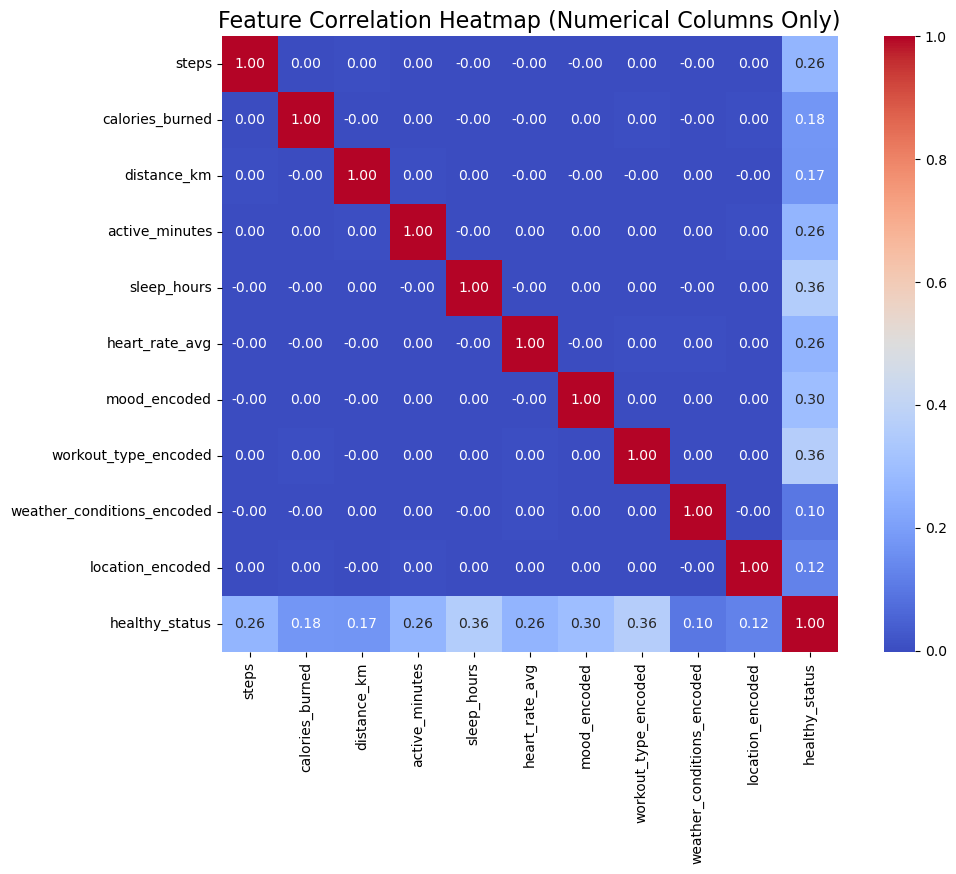

In [38]:
# Select only numerical columns (int and float)
numerical_cols = encoded_file.select_dtypes(include=['float64', 'int64', 'int32']).columns
correlation_matrix = encoded_file[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    square=True, 
    cbar=True
)
plt.title("Feature Correlation Heatmap (Numerical Columns Only)", fontsize=16)
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# Features and Target Variable
X = encoded_file.drop(['healthy_status'], axis=1)
y = encoded_file['healthy_status']

# Step 1: Split into train+validation and test sets (80-20 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Split train+validation into train and validation sets (80-20 split of train+validation)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42  # 0.25 * 0.8 = 0.2 of the total
)

# Verify the sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 438600
Validation set size: 146200
Test set size: 146200


In [41]:
# Replace SVM with CatBoost and MLP
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

In [42]:
X_train

,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,mood_encoded,workout_type_encoded,weather_conditions_encoded,location_encoded
520949,0.961948,1.535179,-1.521022,0.770713,1.069164,-0.330043,0,0,0,4
506221,-0.814940,0.822955,0.078885,0.049691,-1.270016,1.661031,0,6,2,4
435770,0.972227,-0.255010,-1.314974,1.520575,1.704497,1.401326,0,4,2,2
629895,0.960562,0.205098,-0.068292,-1.498102,-1.529924,-1.657425,0,5,3,2
81203,1.616457,-0.688292,-0.885561,1.568643,-1.270016,-0.070338,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...
351833,1.291108,-0.622441,0.878839,0.028061,-0.923471,0.073943,2,5,0,2
249128,1.033901,0.644244,-1.467346,0.241964,1.617860,-0.358899,0,6,1,2
14120,0.137431,-1.047474,0.238183,-0.137774,-0.172623,-1.484288,1,4,2,1
17851,-0.339794,-0.616549,-0.303777,1.494138,1.300194,0.968484,3,1,1,3


In [43]:
X_train.isnull().sum()

steps                         0
calories_burned               0
distance_km                   0
active_minutes                0
sleep_hours                   0
heart_rate_avg                0
mood_encoded                  0
workout_type_encoded          0
weather_conditions_encoded    0
location_encoded              0
dtype: int64

In [44]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Collect evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    # Save results
    results[name] = {"accuracy": accuracy, "report": report, "confusion_matrix": confusion}

c:\Users\user\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:15:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: Logistic Regression
Accuracy: 0.9997
Classification Report:
{'0': {'precision': 0.9997351940365697, 'recall': 0.99968224967232, 'f1-score': 0.9997087211534642, 'support': 75531.0}, '1': {'precision': 0.9996604077936412, 'recall': 0.9997169904767296, 'f1-score': 0.9996886983345361, 'support': 70669.0}, 'accuracy': 0.9996990424076607, 'macro avg': {'precision': 0.9996978009151054, 'recall': 0.9996996200745247, 'f1-score': 0.9996987097440002, 'support': 146200.0}, 'weighted avg': {'precision': 0.999699044453796, 'recall': 0.9996990424076607, 'f1-score': 0.9996990426815708, 'support': 146200.0}}
Confusion Matrix:


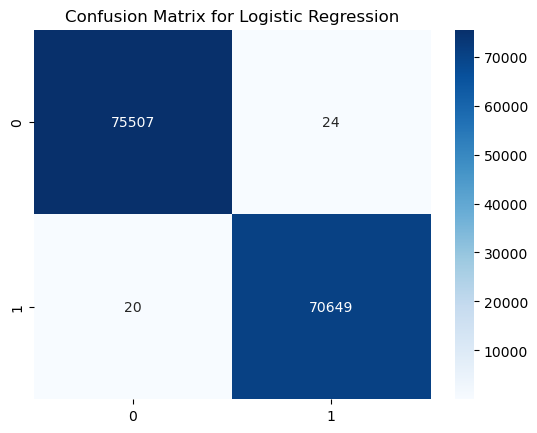

Model: Random Forest
Accuracy: 0.9493
Classification Report:
{'0': {'precision': 0.9460167371688254, 'recall': 0.9563622883319431, 'f1-score': 0.9511613820709997, 'support': 75531.0}, '1': {'precision': 0.9528084417908739, 'recall': 0.9416717372539586, 'f1-score': 0.9472073559553632, 'support': 70669.0}, 'accuracy': 0.9492612859097127, 'macro avg': {'precision': 0.9494125894798496, 'recall': 0.9490170127929509, 'f1-score': 0.9491843690131814, 'support': 146200.0}, 'weighted avg': {'precision': 0.9492996576471806, 'recall': 0.9492612859097127, 'f1-score': 0.9492501161916159, 'support': 146200.0}}
Confusion Matrix:


C:\Users\user\AppData\Local\Temp\ipykernel_8068\1824410368.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  evaluation_table = pd.concat([evaluation_table, pd.DataFrame(rows)], ignore_index=True)


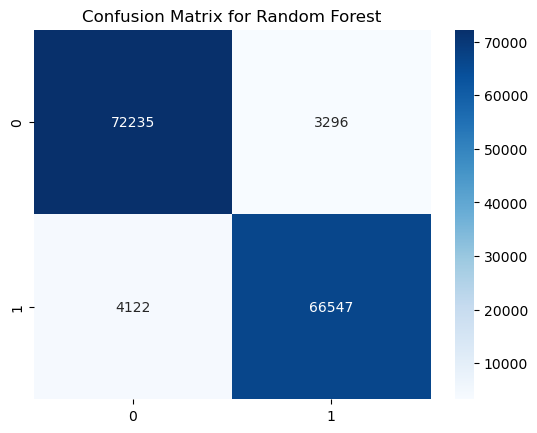

Model: XGBoost
Accuracy: 0.9781
Classification Report:
{'0': {'precision': 0.9783485656090044, 'recall': 0.9793329891038117, 'f1-score': 0.9788405298468948, 'support': 75531.0}, '1': {'precision': 0.9778873259388324, 'recall': 0.9768356705203131, 'f1-score': 0.977361215330379, 'support': 70669.0}, 'accuracy': 0.9781258549931601, 'macro avg': {'precision': 0.9781179457739184, 'recall': 0.9780843298120624, 'f1-score': 0.9781008725886369, 'support': 146200.0}, 'weighted avg': {'precision': 0.978125615224248, 'recall': 0.9781258549931601, 'f1-score': 0.9781254704928068, 'support': 146200.0}}
Confusion Matrix:


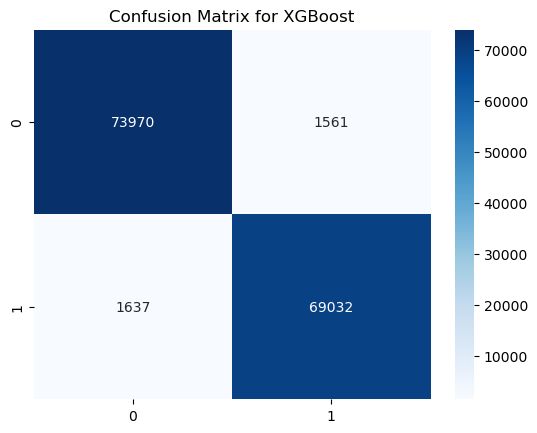

Model: CatBoost
Accuracy: 0.9945
Classification Report:
{'0': {'precision': 0.9944032812913469, 'recall': 0.9950483907269863, 'f1-score': 0.994725731415979, 'support': 75531.0}, '1': {'precision': 0.9947040498442368, 'recall': 0.9940143485828298, 'f1-score': 0.9943590796169554, 'support': 70669.0}, 'accuracy': 0.9945485636114911, 'macro avg': {'precision': 0.9945536655677918, 'recall': 0.9945313696549081, 'f1-score': 0.9945424055164671, 'support': 146200.0}, 'weighted avg': {'precision': 0.9945486644162728, 'recall': 0.9945485636114911, 'f1-score': 0.9945485021684742, 'support': 146200.0}}
Confusion Matrix:


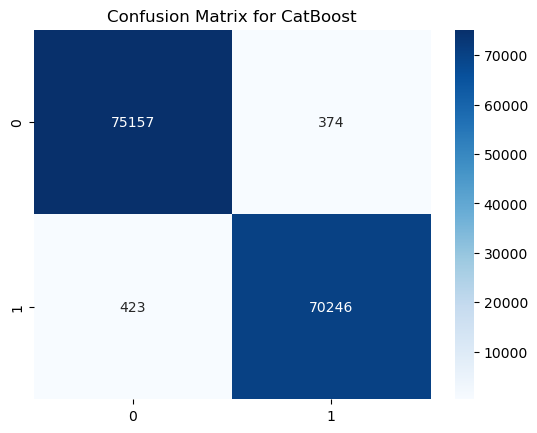

Model: MLP
Accuracy: 0.9975
Classification Report:
{'0': {'precision': 0.999680897741022, 'recall': 0.9954455786365863, 'f1-score': 0.9975587427525175, 'support': 75531.0}, '1': {'precision': 0.9951541788164363, 'recall': 0.9996603885720754, 'f1-score': 0.9974021940165751, 'support': 70669.0}, 'accuracy': 0.9974829001367989, 'macro avg': {'precision': 0.9974175382787291, 'recall': 0.9975529836043309, 'f1-score': 0.9974804683845464, 'support': 146200.0}, 'weighted avg': {'precision': 0.9974928081399169, 'recall': 0.9974829001367989, 'f1-score': 0.997483071462365, 'support': 146200.0}}
Confusion Matrix:


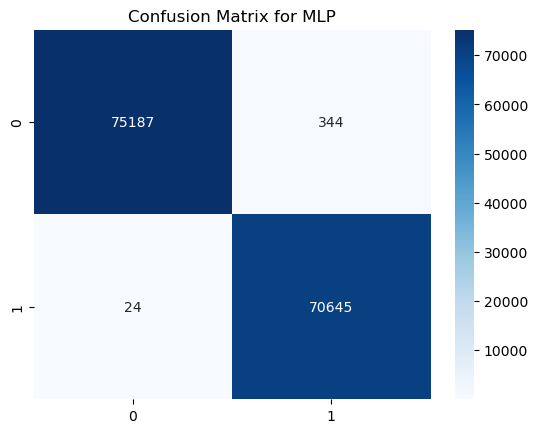

In [45]:
# DataFrame to store results
evaluation_table = pd.DataFrame(columns=["Model", "Health Label (Encoded)", "Precision", "Recall", "F1 Score", "Support"])

# Visualization of Results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['report'])
    print("Confusion Matrix:")
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

    # Add classification report metrics to the table
    rows = []
    for health_label, metrics in result["report"].items():
        if health_label.isdigit():  # Filter only numeric health labels (encoded classes)
            rows.append({
                "Model": name,
                "Health Label (Encoded)": health_label,
                "Precision": metrics["precision"],
                "Recall": metrics["recall"],
                "F1 Score": metrics["f1-score"],
                "Support": metrics["support"]
            })
    
    # Concatenate rows into the DataFrame
    evaluation_table = pd.concat([evaluation_table, pd.DataFrame(rows)], ignore_index=True)

In [46]:

# Display the evaluation table
print("\nEvaluation Results in Tabular Format:")
evaluation_table


Evaluation Results in Tabular Format:


,Model,Health Label (Encoded),Precision,Recall,F1 Score,Support
0,Logistic Regression,0,0.999735,0.999682,0.999709,75531.0
1,Logistic Regression,1,0.999660,0.999717,0.999689,70669.0
2,Random Forest,0,0.946017,0.956362,0.951161,75531.0
3,Random Forest,1,0.952808,0.941672,0.947207,70669.0
4,XGBoost,0,0.978349,0.979333,0.978841,75531.0
5,XGBoost,1,0.977887,0.976836,0.977361,70669.0
6,CatBoost,0,0.994403,0.995048,0.994726,75531.0
7,CatBoost,1,0.994704,0.994014,0.994359,70669.0
8,MLP,0,0.999681,0.995446,0.997559,75531.0
9,MLP,1,0.995154,0.999660,0.997402,70669.0


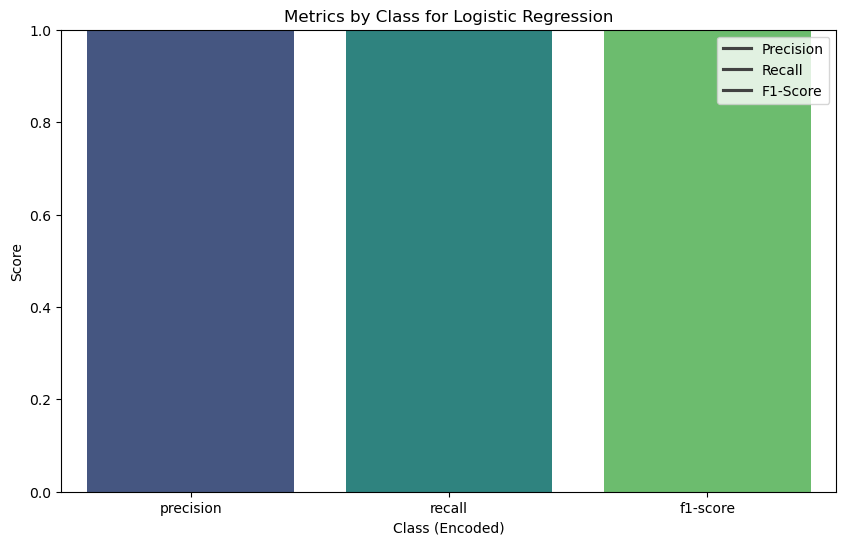

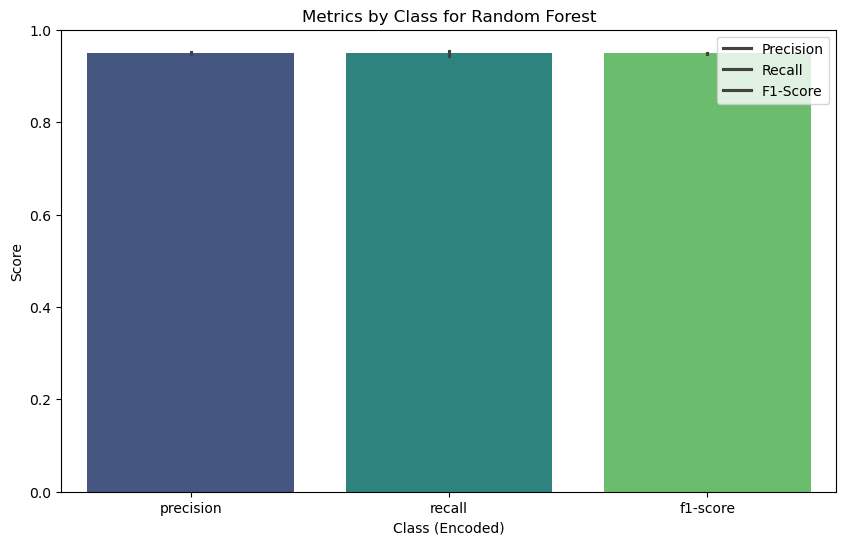

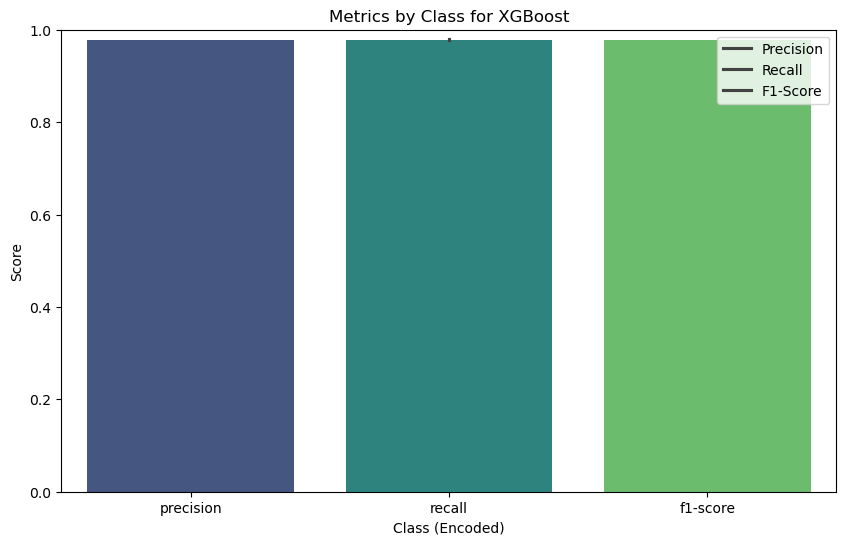

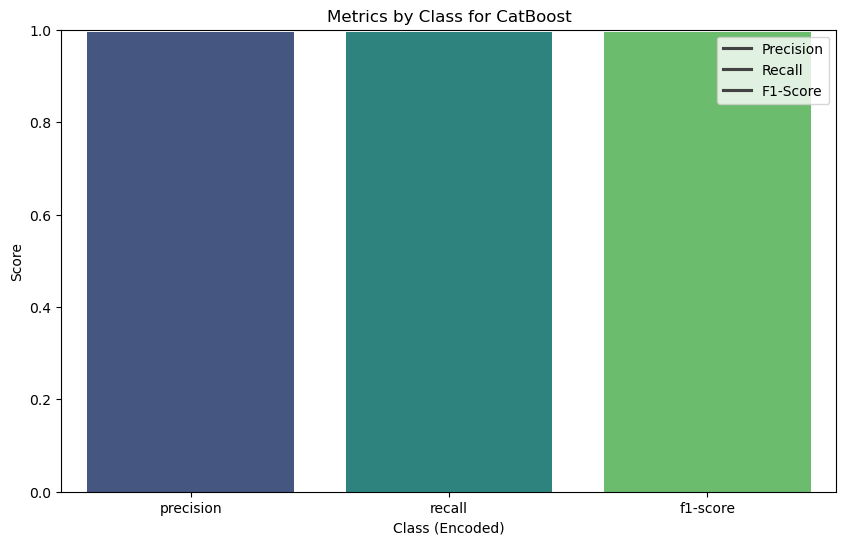

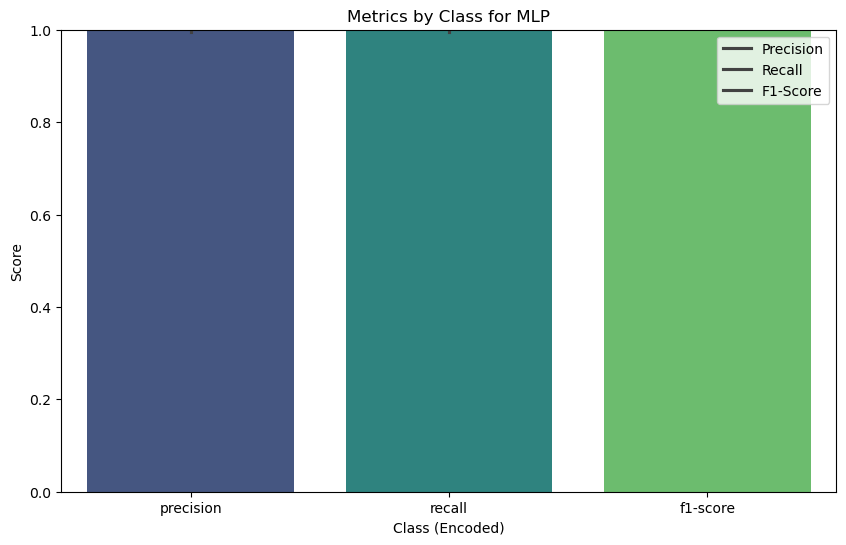

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

for name, result in results.items():
    metrics = pd.DataFrame(result["report"]).transpose()
    metrics = metrics.drop(index=["accuracy"])  # Drop overall accuracy row

    plt.figure(figsize=(10, 6))
    sns.barplot(data=metrics[["precision", "recall", "f1-score"]], palette="viridis")
    plt.title(f"Metrics by Class for {name}")
    plt.ylabel("Score")
    plt.xlabel("Class (Encoded)")
    plt.ylim(0, 1)
    plt.legend(["Precision", "Recall", "F1-Score"])
    plt.show()


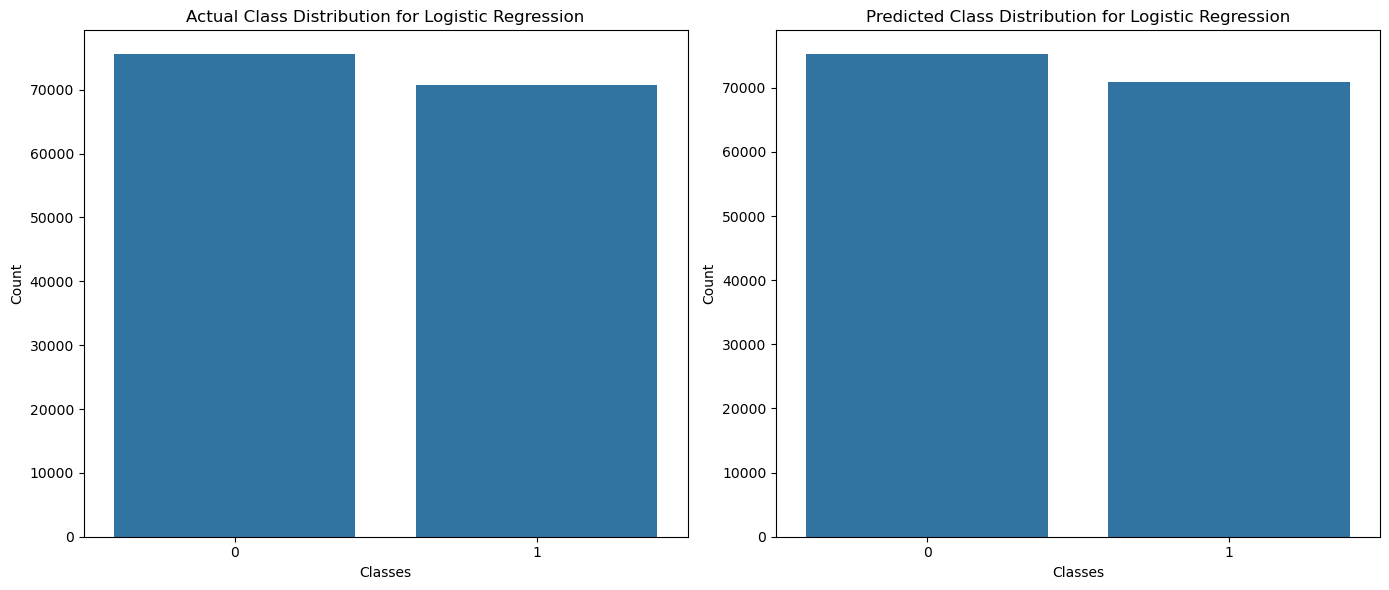

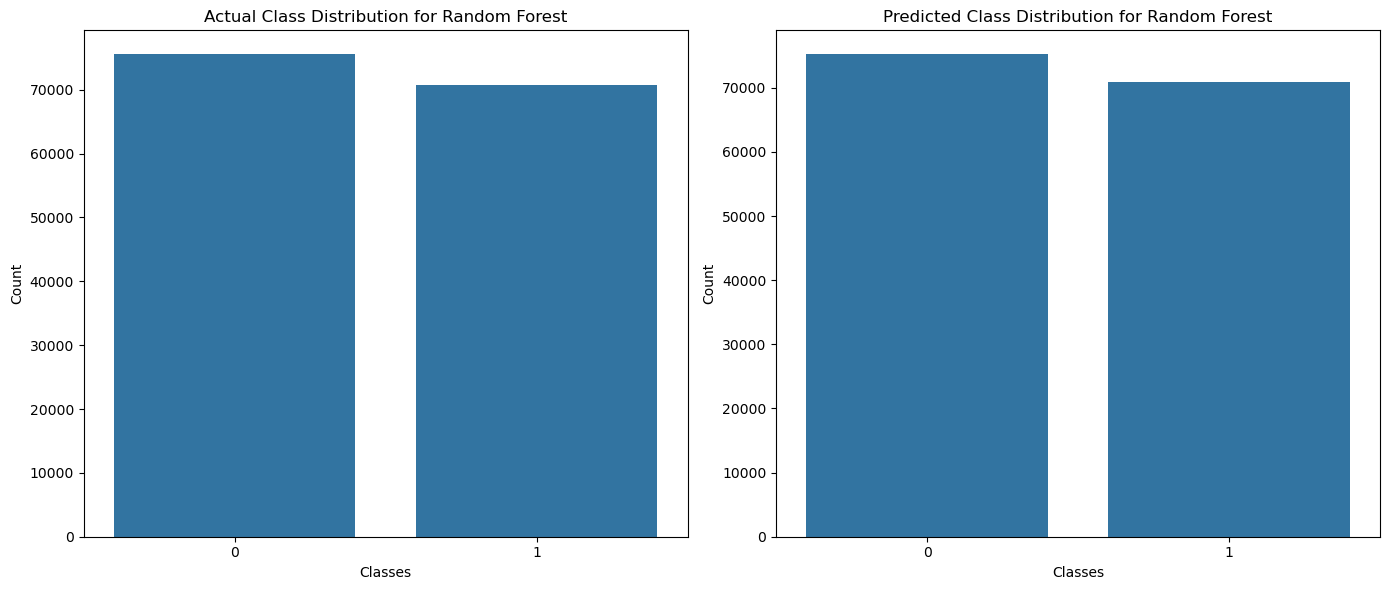

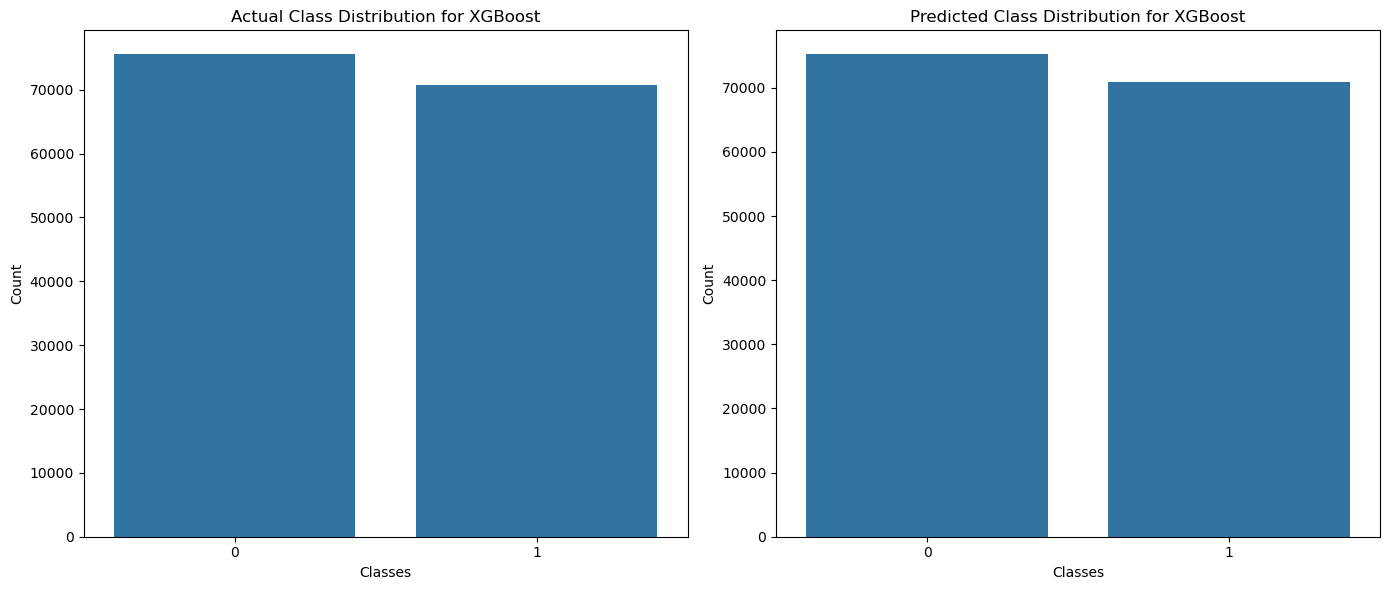

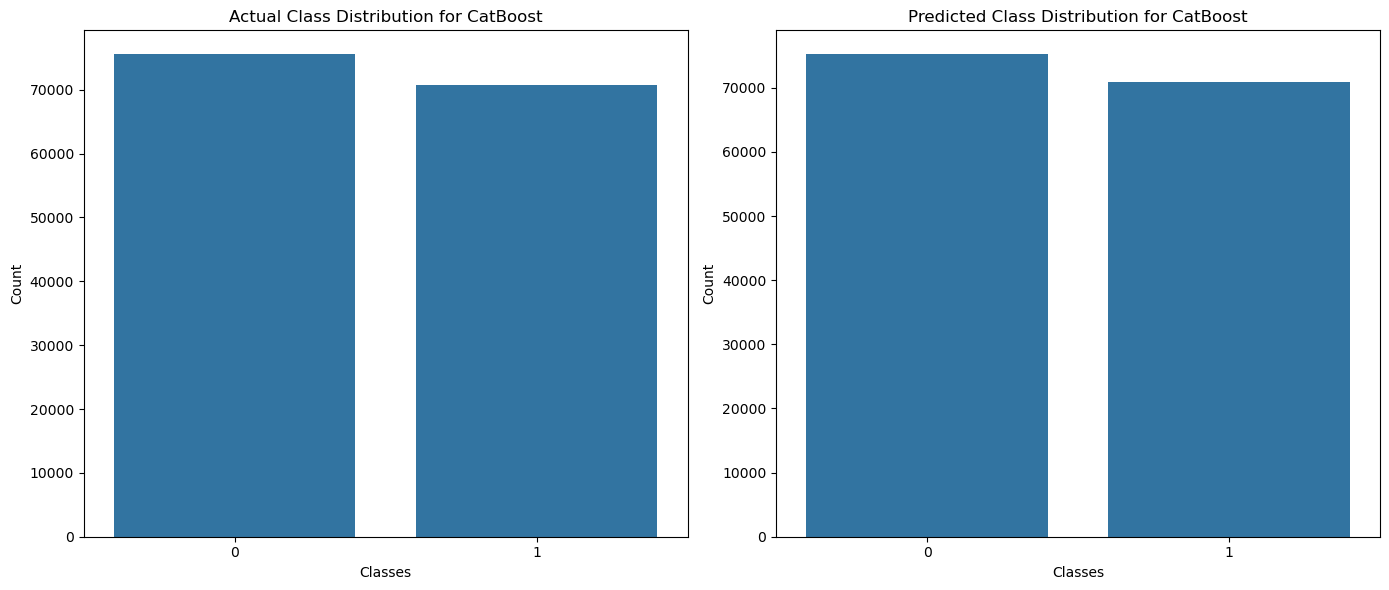

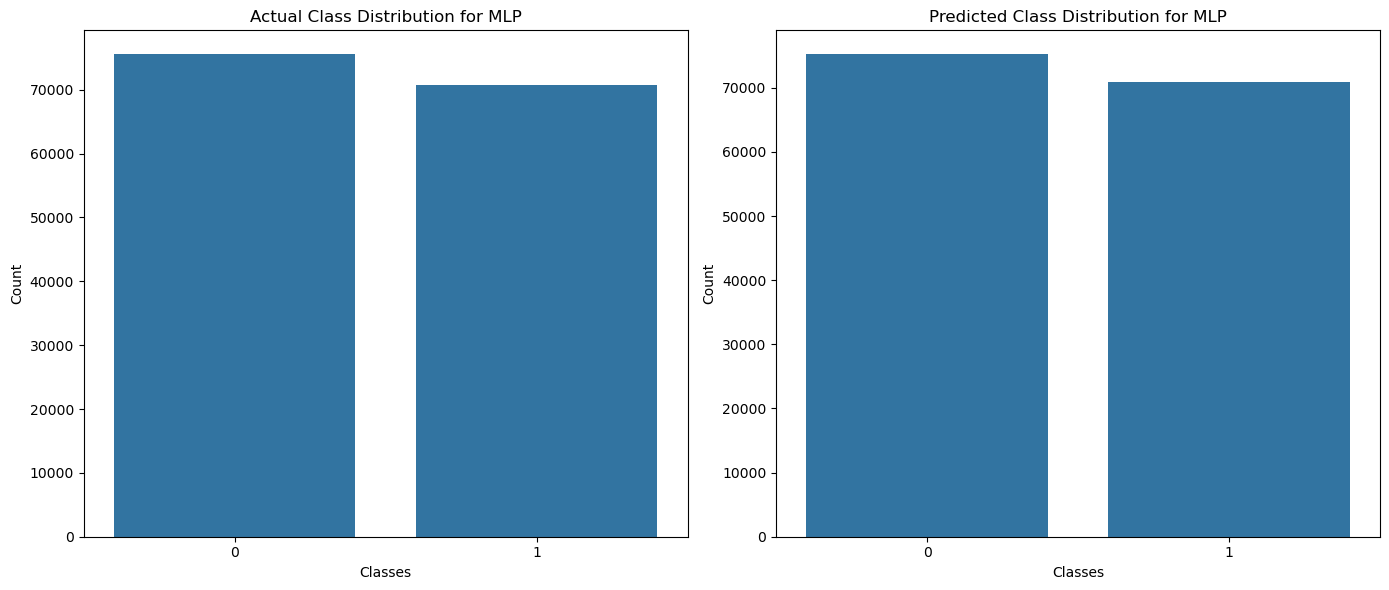

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class distribution visualization function
def plot_class_distribution(y_true, y_pred, model_name):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    
    sns.countplot(x=y_true, ax=axes[0])
    axes[0].set_title(f'Actual Class Distribution for {model_name}')
    axes[0].set_xlabel('Classes')
    axes[0].set_ylabel('Count')
    
    sns.countplot(x=y_pred, ax=axes[1])
    axes[1].set_title(f'Predicted Class Distribution for {model_name}')
    axes[1].set_xlabel('Classes')
    axes[1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

# Plot class distribution for each model
for name, result in results.items():
    y_pred = model.predict(X_test)  # Make predictions for each model
    plot_class_distribution(y_test, y_pred, name)


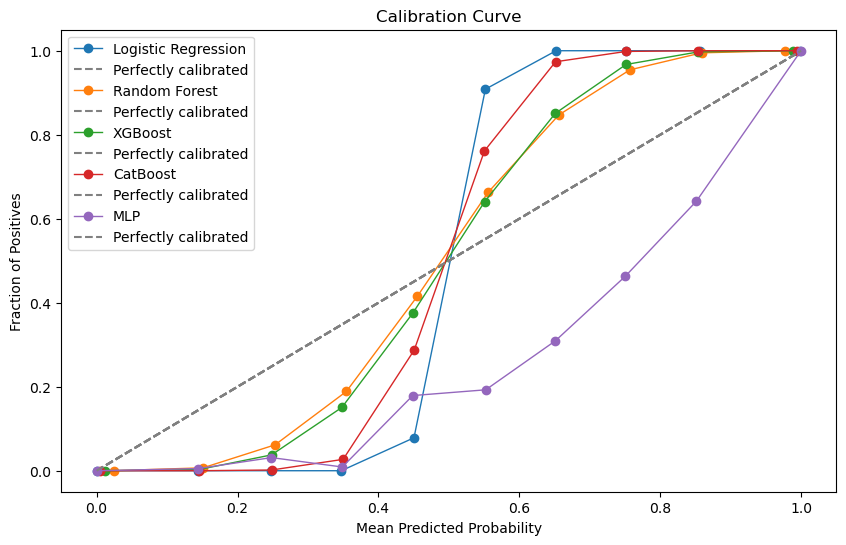

In [49]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Function to plot calibration curve
def plot_calibration_curve(y_true, y_probs, model_name, n_bins=10):
    prob_true, prob_pred = calibration_curve(y_true, y_probs, n_bins=n_bins)

    plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label=f'{model_name}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')

    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve')
    plt.legend(loc='best')

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_true = y_test

    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    plot_calibration_curve(y_true, y_probs, name)

plt.show()


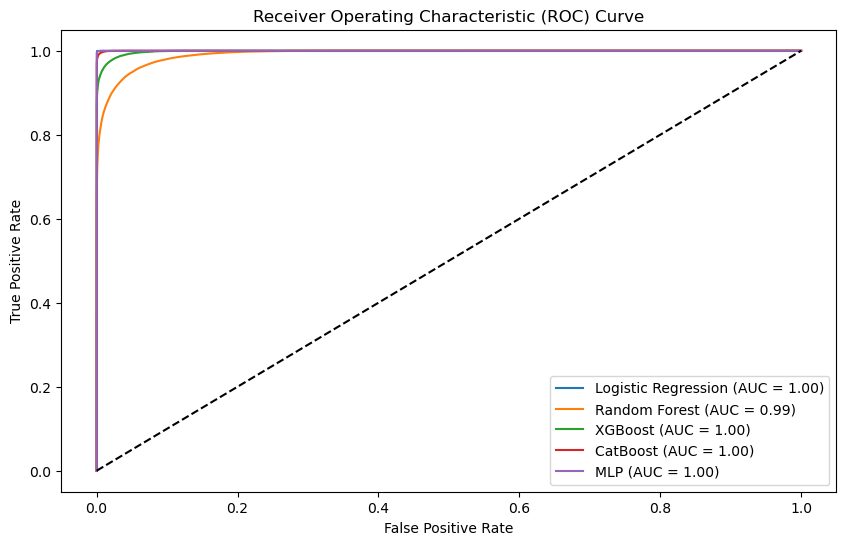

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, result in results.items():
    # Get the model and true labels
    model = models[name]
    y_true = y_test

    # Predict probabilities
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
    else:
        y_probs = model.decision_function(X_test)
    
    # Compute ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [51]:
best_model=models['Random Forest']

In [52]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}


In [53]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=best_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to test
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

X_sample, _, y_sample, _ = train_test_split(X_train, y_train, train_size=0.3, random_state=42)
random_search.fit(X_sample, y_sample)

# Display the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
Best Cross-Validation Accuracy: 0.9359857121143031


In [54]:
# Train the model with the best parameters on the full training set
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = best_rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy with Best Hyperparameters:", val_accuracy)

Validation Accuracy with Best Hyperparameters: 0.9475649794801642


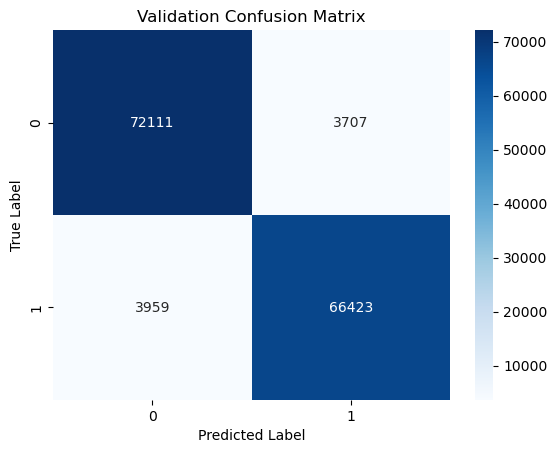

In [55]:
# Plot the confusion matrix for validation predictions
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
# Train the best model on the training set
best_rf_model.fit(X_train, y_train)
# Predict on the test set
y_test_pred = best_rf_model.predict(X_test)
# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.9474965800273598
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     75531
           1       0.95      0.94      0.95     70669

    accuracy                           0.95    146200
   macro avg       0.95      0.95      0.95    146200
weighted avg       0.95      0.95      0.95    146200



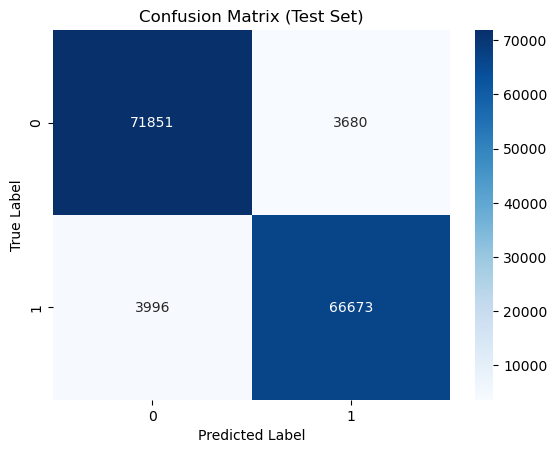

In [57]:
# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [58]:
X_train

,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,mood_encoded,workout_type_encoded,weather_conditions_encoded,location_encoded
520949,0.961948,1.535179,-1.521022,0.770713,1.069164,-0.330043,0,0,0,4
506221,-0.814940,0.822955,0.078885,0.049691,-1.270016,1.661031,0,6,2,4
435770,0.972227,-0.255010,-1.314974,1.520575,1.704497,1.401326,0,4,2,2
629895,0.960562,0.205098,-0.068292,-1.498102,-1.529924,-1.657425,0,5,3,2
81203,1.616457,-0.688292,-0.885561,1.568643,-1.270016,-0.070338,0,1,3,2
...,...,...,...,...,...,...,...,...,...,...
351833,1.291108,-0.622441,0.878839,0.028061,-0.923471,0.073943,2,5,0,2
249128,1.033901,0.644244,-1.467346,0.241964,1.617860,-0.358899,0,6,1,2
14120,0.137431,-1.047474,0.238183,-0.137774,-0.172623,-1.484288,1,4,2,1
17851,-0.339794,-0.616549,-0.303777,1.494138,1.300194,0.968484,3,1,1,3


In [59]:
X_train.columns

Index(['steps', 'calories_burned', 'distance_km', 'active_minutes',
       'sleep_hours', 'heart_rate_avg', 'mood_encoded', 'workout_type_encoded',
       'weather_conditions_encoded', 'location_encoded'],
      dtype='object')

In [60]:
y_train

520949    0
506221    1
435770    1
629895    0
81203     0
         ..
351833    1
249128    1
14120     0
17851     1
214594    1
Name: healthy_status, Length: 438600, dtype: int32

In [61]:
import dill
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define the preprocessing class
class DataPreprocessor:
    def __init__(self):
        # Define mappings for categorical encoding
        self.mappings = {
            'mood': {'Tired': 1, 'Neutral': 2, 'Happy': 3, 'Stressed': 0},
            'workout_type': {
                'No Workout': 0, 'Walking': 1, 'Cycling': 2, 'Yoga': 3,
                'Gym Workout': 4, 'Running': 5, 'Swimming': 6
            },
            'weather_conditions': {'Fog': 0, 'Rain': 1, 'Snow': 2, 'Clear': 3},
            'location': {'Other': 0, 'Home': 1, 'Office': 2, 'Park': 3, 'Gym': 4}
        }
        self.scaler = StandardScaler()  # Initialize the scaler

    def preprocess(self, data, fit_scaler=False):
        # Make a copy to avoid modifying the original data
        encoded_data = data.copy()

        # Encode categorical variables
        if 'mood' in encoded_data.columns:
            encoded_data['mood_encoded'] = encoded_data['mood'].map(self.mappings['mood'])
        if 'workout_type' in encoded_data.columns:
            encoded_data['workout_type_encoded'] = encoded_data['workout_type'].map(self.mappings['workout_type'])
        if 'weather_conditions' in encoded_data.columns:
            encoded_data['weather_conditions_encoded'] = encoded_data['weather_conditions'].map(self.mappings['weather_conditions'])
        if 'location' in encoded_data.columns:
            encoded_data['location_encoded'] = encoded_data['location'].map(self.mappings['location'])

        # Identify numerical columns excluding specific columns
        excluded_cols = ['user_id', 'mood_encoded', 'workout_type_encoded', 'weather_conditions_encoded', 'location_encoded']
        numerical_cols = encoded_data.select_dtypes(include=['float64', 'int64']).columns.difference(excluded_cols)

        # Apply Z-score normalization
        if fit_scaler:  # Fit and transform during training
            encoded_data[numerical_cols] = self.scaler.fit_transform(encoded_data[numerical_cols])
        else:  # Only transform during testing
            encoded_data[numerical_cols] = self.scaler.transform(encoded_data[numerical_cols])

        # Select columns for final features
        normalized_columns = [
            'steps', 'calories_burned', 'distance_km',
            'active_minutes', 'sleep_hours', 'heart_rate_avg'
        ]
        encoded_features = [
            'mood_encoded', 'workout_type_encoded', 
            'weather_conditions_encoded', 'location_encoded'
        ]
        all_selected_features = normalized_columns + encoded_features
        return encoded_data[all_selected_features]

# Instantiate the Preprocessor
preprocessor = DataPreprocessor()

# Example training data to fit the preprocessor (replace this with your actual training dataset)
training_data = pd.read_csv("healthy_lifestyle_original_data_with_scores(FYPCODE3).csv")
training_data.drop(columns=['healthy_status'], inplace=True)

# Fit the preprocessor on training data
preprocessed_training_data = preprocessor.preprocess(training_data, fit_scaler=True)

# Save the Preprocessor object
preprocessor_file_path = "D:/FYP/data_preprocessor(Classification).pkl"
with open(preprocessor_file_path, "wb") as f:
    dill.dump(preprocessor, f)

print(f"Preprocessor object saved to {preprocessor_file_path}")


Preprocessor object saved to D:/FYP/data_preprocessor(Classification).pkl


In [62]:
import joblib
import os

# Define the directory where you want to save the model
directory = "D:\FYP"

# Ensure the directory exists, create it if not
os.makedirs(directory, exist_ok=True)

# Define the full path for the model file
file_path = os.path.join(directory, 'healthy_lifestyle_model(Classification).pkl')

# Save the model to the specified directory
joblib.dump(best_rf_model, file_path)

print(f"Model saved at: {file_path}")

<>:5: SyntaxWarning: invalid escape sequence '\F'
<>:5: SyntaxWarning: invalid escape sequence '\F'
C:\Users\user\AppData\Local\Temp\ipykernel_8068\2751409091.py:5: SyntaxWarning: invalid escape sequence '\F'
  directory = "D:\FYP"


Model saved at: D:\FYP\healthy_lifestyle_model(Classification).pkl


In [63]:
import joblib
import dill
import pandas as pd

model_path = "healthy_lifestyle_model(Classification).pkl"

# Load the Preprocessor object
preprocess_path = "D:/FYP/data_preprocessor(Classification).pkl"
with open(preprocess_path, "rb") as f:
    preprocessor = dill.load(f)  # Load as an object, not a function

# Load the trained model
model = joblib.load(model_path)

# Dummy data
data = {
    'user_id': 123,
    'date': '31/12/2024',
    'mood': 'Happy',
    'workout_type': 'Walking',
    'weather_conditions': 'Clear',
    'location': 'Park',
    'steps': 3000,
    'calories_burned': 1500,
    'distance_km': 2.6,
    'active_minutes': 20,
    'sleep_hours': 8,
    'heart_rate_avg': 75
}
df = pd.DataFrame([data])

# Preprocessing
print("Before preprocessing")
print(df)
preprocessed_data = preprocessor.preprocess(df)  # Use the `preprocess` method
print("After preprocessing:", preprocessed_data)

# Prediction
print("Before prediction")
prediction = model.predict(preprocessed_data)  # Use the loaded model
print("After prediction:", prediction)

# Output the prediction
print(f"Prediction: {prediction}")


Before preprocessing
   user_id        date   mood workout_type weather_conditions location  steps  \
0      123  31/12/2024  Happy      Walking              Clear     Park   3000   

   calories_burned  distance_km  active_minutes  sleep_hours  heart_rate_avg  
0             1500          2.6              20            8              75  
After preprocessing:       steps  calories_burned  distance_km  active_minutes  sleep_hours  \
0 -1.387448        -1.732458    -1.280344        -1.68076     0.578225   

   heart_rate_avg  mood_encoded  workout_type_encoded  \
0       -1.282295             3                     1   

   weather_conditions_encoded  location_encoded  
0                           3                 3  
Before prediction
After prediction: [0]
Prediction: [0]
